In [23]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
from tensorflow.keras.applications.xception import Xception


In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# cwr = os.getcwd().strip('/notebooks')
# index = pd.read_csv(f'/{cwr}/raw_data/index.csv')
# metadata = pd.read_csv(f'/{cwr}/raw_data/metadata.csv',index_col='class_id')
# test = pd.read_csv(f'/{cwr}/raw_data/test.csv')
# metadata.head()

os.chdir('/content/drive/MyDrive/Colab Notebooks/minifig')

index = pd.read_csv('raw_data/index.csv')
metadata = pd.read_csv('raw_data/metadata.csv', index_col='class_id')
test = pd.read_csv('raw_data/test.csv')

index.head()

,path,class_id
0,marvel/0001/001.jpg,1
1,marvel/0001/002.jpg,1
2,marvel/0001/003.jpg,1
3,marvel/0001/004.jpg,1
4,marvel/0001/005.jpg,1


In [26]:
# images = []
# tests = []
# for path in index['path']:
#     image = np.asarray(Image.open(f'/{cwr}/raw_data/{path}')
#                        .resize((224, 224)))
#     images.append(image)

# for path in test['path']:
#     image = np.asarray(Image.open(f'/{cwr}/raw_data/{path}')
#                        .resize((224, 224)))
#     tests.append(image)

# images = np.stack(images,axis=0)
# tests = np.stack(tests,axis=0)
# images.shape, tests.shape


images = []
tests = []

os.chdir('/content/drive/MyDrive/Colab Notebooks/minifig/raw_data')

for path in index['path']:
    image = np.asarray(Image.open(path)\
        .resize((299, 299))
        )
    images.append(image)
for path in test['path']:
    image = np.asarray(Image.open(path)\
        .resize((299, 299))
        )
    tests.append(image)
images = np.stack(images,axis=0)
tests = np.stack(tests,axis=0)
images.shape, tests.shape

((371, 299, 299, 3), (79, 299, 299, 3))

In [27]:
X_train = images
X_test = tests
y_train = np.array(index['class_id'])-1
y_test = np.array(test['class_id'])-1


In [28]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Rescaling


In [31]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    featurewise_center = False,
    featurewise_std_normalization = False,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    zoom_range = (0.8, 1.2),
    shear_range=0.15,
    )

test_datagen = ImageDataGenerator(
    rescale = 1./255)


In [32]:
train_flow = train_datagen.flow(X_train, y_train, batch_size = 16)
valid_flow = test_datagen.flow(X_test, y_test, batch_size = 1)

In [ ]:
# def load_baseline_model():

#     model = Sequential()
#     model.add(Rescaling(1./255, input_shape=(224,224,3)))

#     model.add(layers.Conv2D(16, kernel_size=10, activation='relu'))
#     model.add(layers.MaxPooling2D(3))

#     model.add(layers.Conv2D(32, kernel_size=6, activation="relu"))
#     model.add(layers.MaxPooling2D(3))

#     model.add(layers.Flatten())
#     model.add(layers.Dense(38, activation='softmax'))

#     opt = optimizers.Adam(learning_rate=1e-4)
#     model.compile(loss='sparse_categorical_crossentropy',
#                   optimizer=opt,
#                   metrics=['accuracy'])

#     return model

In [21]:
# model_homemade = load_baseline_model()
# model_homemade.summary()


In [33]:
from keras.applications.xception import Xception

# Load the Xception model
model_xception = Xception(weights='imagenet')

In [34]:
opt = optimizers.Adam(learning_rate=1e-4)

model_xception.compile(loss='sparse_categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

In [35]:
es = EarlyStopping(monitor = 'val_accuracy',
                   patience = 10,
                   verbose = 1,
                   restore_best_weights = True)

history = model_xception.fit(train_flow,
                             validation_data=(valid_flow),
                             batch_size = 16,
                             epochs = 100,
                             callbacks=[es])



Epoch 1/100
24/24 [==============================] - 46s 675ms/step - loss: 6.2661 - accuracy: 0.0243 - val_loss: 4.7234 - val_accuracy: 0.0253
Epoch 2/100
24/24 [==============================] - 15s 609ms/step - loss: 3.7513 - accuracy: 0.3261 - val_loss: 3.0527 - val_accuracy: 0.2785
Epoch 3/100
24/24 [==============================] - 14s 574ms/step - loss: 1.7570 - accuracy: 0.6604 - val_loss: 2.1165 - val_accuracy: 0.5190
Epoch 4/100
24/24 [==============================] - 14s 593ms/step - loss: 0.5984 - accuracy: 0.9111 - val_loss: 1.2430 - val_accuracy: 0.7722
Epoch 5/100
24/24 [==============================] - 15s 598ms/step - loss: 0.1938 - accuracy: 0.9892 - val_loss: 1.0189 - val_accuracy: 0.7722
Epoch 6/100
24/24 [==============================] - 15s 617ms/step - loss: 0.0834 - accuracy: 0.9973 - val_loss: 0.8074 - val_accuracy: 0.8228
Epoch 7/100
24/24 [==============================] - 15s 609ms/step - loss: 0.0699 - accuracy: 0.9973 - val_loss: 0.7342 - val_accuracy:

In [19]:
# es = EarlyStopping(monitor = 'val_accuracy',
#                    patience = 10,
#                    verbose = 1,
#                    restore_best_weights = True)

# history = model_homemade.fit(X_train, y_train,
#                              validation_data=(X_test, y_test),
#                              batch_size = 16,
#                              epochs = 100,
#                              callbacks=[es])


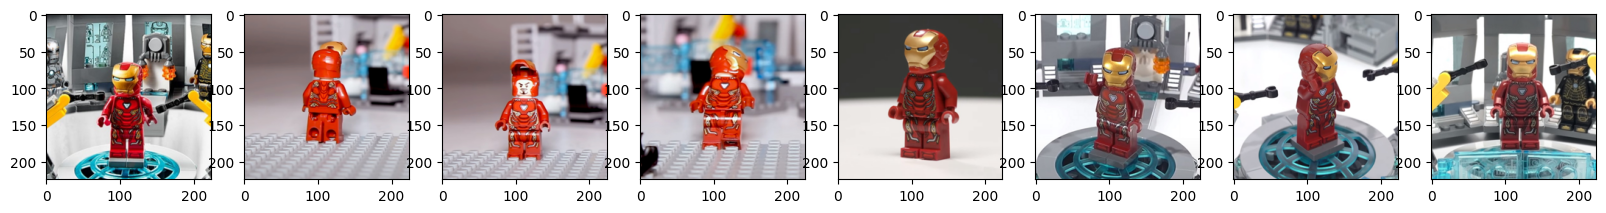

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
length=8
for i in range(length):
    plt.subplot(1,length,i+1)
    plt.imshow(X_train[i])


In [ ]:
res = model_homemade.evaluate(X_test, y_test)
res


3/3 [==============================] - 0s 32ms/step - loss: 3.5755 - accuracy: 0.3418


[3.57554292678833, 0.3417721390724182]

In [ ]:
test_accuracy = res[-1]
print(f"test_accuracy = {round(test_accuracy,3)*100} %")


test_accuracy = 34.2 %


In [36]:
res_xception = model_xception.evaluate(X_test, y_test)
res_xception
test_accuracy = res_xception[-1]
print(f"xception test_accuracy = {round(test_accuracy,3)*100} %")

3/3 [==============================] - 2s 172ms/step - loss: 4989.6494 - accuracy: 0.0380
xception test_accuracy = 3.8 %


In [ ]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    # ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy' + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy' + exp_name)
    # ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

(<AxesSubplot:title={'center':'loss'}>,
 <AxesSubplot:title={'center':'Accuracy'}>)

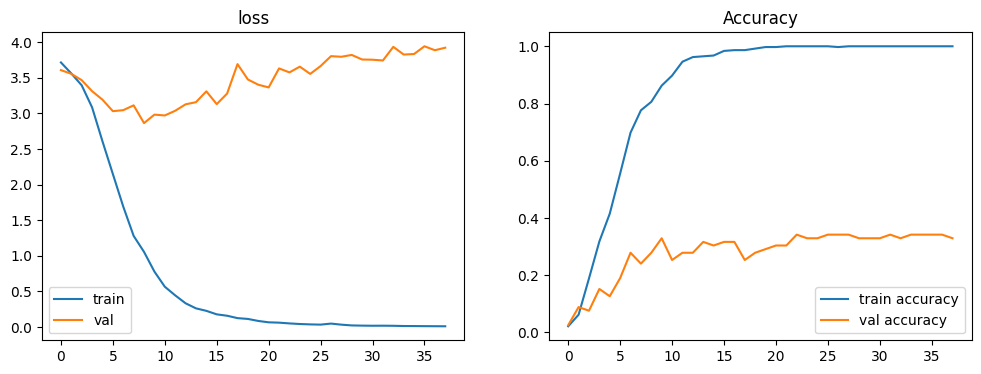

In [ ]:
plot_history(history, title='Lego', axs=None, exp_name="")